# Overfitting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
df = pd.read_csv('../Resources/meet_or_beat.csv')
df.keys()

Index(['EPS', 'forecasted_eps', 'noOfEsts', 'after_total_returns',
       'before_total_returns'],
      dtype='object')

### Preparing the Data

In [4]:
# Use qcut to group earnings results into 5 buckets
df['earnings_quantile'] = (pd.qcut(df['EPS'], q=5, labels=False))+1
# Verify buckets are approximately balanced 
# (Slight imbalance from ties is OK)
df['earnings_quantile'].value_counts()

2    14676
1    14555
5    14268
4    14251
3    14218
Name: earnings_quantile, dtype: int64

In [5]:
# Save bucket ("quantile") value as the new  `y` variable
y_quantile = df['earnings_quantile']

In [6]:
# Save the unique count of categories for later use
number_of_classes = len(y_quantile.unique())

In [7]:
# Encode quantiles into labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_quantile)
encoded_y = encoder.transform(y_quantile)
encoded_y

array([4, 2, 1, ..., 2, 1, 0], dtype=int64)

In [8]:
# Encode labels into categories
from keras.utils.np_utils import to_categorical
y_categorical = to_categorical(encoded_y, num_classes=number_of_classes)

In [9]:
# Specify X (predictor) variables
X = df[['forecasted_eps',
              'before_total_returns','noOfEsts']]
X.head(3)

,forecasted_eps,before_total_returns,noOfEsts
0,1.67,0.018585,11.0
1,0.19,-0.000510,6.0
2,0.14,-0.046104,4.0


In [10]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=1)

In [11]:
# Preview the `y_train` values
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [12]:
# Save the count of unique predictor variables for use in model
number_of_predictors = len(X.columns)
len(X.columns)

3

### Building the Model

In [13]:
# Import the `Dropout` layer
from keras.layers import Dropout
# Import regularizers
from keras.regularizers import l1, l2

In [14]:
# Build the Model
model = Sequential()
# Add a dense layer (as before)
model.add(Dense(10, input_dim=number_of_predictors, activation='relu'))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))
# Add regularization to another dense layer
model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

In [15]:
# Add the final output layer
# (Set the # of possible outputs equal to the number classes)
model.add(Dense(number_of_classes, activation='softmax'))

In [16]:
# Compile the model
model.compile(loss="categorical_crossentropy", 
              optimizer= "adam", 
              metrics=['categorical_accuracy'])

#for binary classification, we use loss="binary_crossentropy"  and metrics=['accuracy']
#input use linear regression


In [17]:
# Summarise the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Add in validation loss to select the number of epochs
# Fit the model
number_of_epochs = 50
model.fit(X_train,y_train, 
                    epochs=number_of_epochs,
                    batch_size=1000,
                      validation_split=0.2,
                    shuffle=True)

Epoch 1/50
44/44 [==============================] - 3s 15ms/step - loss: 1.9014 - categorical_accuracy: 0.1378 - val_loss: 1.7383 - val_categorical_accuracy: 0.0854
Epoch 2/50
44/44 [==============================] - 0s 5ms/step - loss: 1.7960 - categorical_accuracy: 0.1410 - val_loss: 1.6727 - val_categorical_accuracy: 0.2146
Epoch 3/50
44/44 [==============================] - 0s 9ms/step - loss: 1.7160 - categorical_accuracy: 0.1969 - val_loss: 1.6630 - val_categorical_accuracy: 0.2052
Epoch 4/50
44/44 [==============================] - 1s 12ms/step - loss: 1.7211 - categorical_accuracy: 0.2041 - val_loss: 1.6509 - val_categorical_accuracy: 0.2041
Epoch 5/50
44/44 [==============================] - 0s 8ms/step - loss: 1.6970 - categorical_accuracy: 0.2048 - val_loss: 1.6394 - val_categorical_accuracy: 0.2052
Epoch 6/50
44/44 [==============================] - 0s 9ms/step - loss: 1.6860 - categorical_accuracy: 0.2135 - val_loss: 1.6256 - val_categorical_accuracy: 0.2074
Epoch 7/50
44/

In [19]:
# Save model history across epochs
model_history = model.history.history
model_history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [20]:
# View `categorical_accuracy` for the training dataset
model_history['categorical_accuracy']

[0.1377721130847931,
 0.1409911960363388,
 0.1968967169523239,
 0.2040991187095642,
 0.20484019815921783,
 0.21352477371692657,
 0.23457619547843933,
 0.27044928073883057,
 0.340736448764801,
 0.4359194040298462,
 0.47091245651245117,
 0.5146363973617554,
 0.5524085164070129,
 0.571954607963562,
 0.595460832118988,
 0.6073876619338989,
 0.6209356188774109,
 0.6333719491958618,
 0.6471977829933167,
 0.6614173054695129,
 0.6694071292877197,
 0.6793885827064514,
 0.6868225932121277,
 0.692704975605011,
 0.6956924796104431,
 0.7009031772613525,
 0.7052339315414429,
 0.71097731590271,
 0.7152385115623474,
 0.716905951499939,
 0.7185039520263672,
 0.7238073348999023,
 0.7245715856552124,
 0.7288559675216675,
 0.7353867292404175,
 0.733024537563324,
 0.7342519760131836,
 0.7355025410652161,
 0.7386058568954468,
 0.7375405430793762,
 0.7414080500602722,
 0.7403427362442017,
 0.7452524304389954,
 0.7453219294548035,
 0.7497684359550476,
 0.7493515610694885,
 0.7520148158073425,
 0.7519221901893

<AxesSubplot:title={'center':'Performance Across Training and Validation'}>

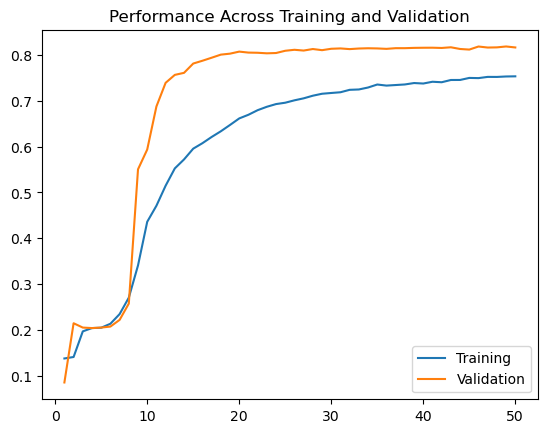

In [21]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index=range(1,number_of_epochs+1))
training_results['Training'] = model_history['categorical_accuracy']
training_results['Validation'] = model_history['val_categorical_accuracy']
training_results.plot(title = 'Performance Across Training and Validation')